In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loding dataset in variable 'df'
df=pd.read_csv('car_evaluation.csv',header=None)

In [3]:
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
# renaming column names
df.columns=['Buy','Maint','Door','Persons','Lug_boot','Safety','Class']

In [5]:
df

,Buy,Maint,Door,Persons,Lug_boot,Safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [6]:
df.shape

(1728, 7)

In [7]:
# Checking value counts
for i in df.columns:
    print(df[i].value_counts())

Buy
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
Maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
Door
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
Persons
2       576
4       576
more    576
Name: count, dtype: int64
Lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
Safety
low     576
med     576
high    576
Name: count, dtype: int64
Class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [8]:
# encoding using ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

In [9]:
oe=OrdinalEncoder()

In [10]:
oe

OrdinalEncoder()

In [11]:
#creating x & y variable
x=df.drop('Class',axis=1)
y=df.Class

In [12]:
# splitting training and testing data

from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [14]:
x_train.shape

(1382, 6)

In [15]:
x_test.shape

(346, 6)

In [16]:
y_train.shape

(1382,)

In [17]:
y_test.shape

(346,)

In [18]:
# Now encoding data to prevent leakage

x_train[['Buy','Maint','Door','Persons','Lug_boot','Safety']]=oe.fit_transform(x_train[['Buy','Maint','Door','Persons','Lug_boot','Safety']])

In [19]:
x_train

,Buy,Maint,Door,Persons,Lug_boot,Safety
107,3.0,3.0,3.0,2.0,0.0,0.0
901,2.0,3.0,1.0,1.0,2.0,2.0
1709,1.0,1.0,3.0,0.0,0.0,0.0
706,0.0,2.0,2.0,0.0,1.0,2.0
678,0.0,2.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...
1130,2.0,2.0,1.0,2.0,1.0,0.0
1294,2.0,1.0,3.0,2.0,0.0,2.0
860,0.0,1.0,3.0,2.0,1.0,0.0
1459,1.0,0.0,2.0,0.0,2.0,2.0


In [20]:
x_test[['Buy','Maint','Door','Persons','Lug_boot','Safety']]=oe.transform(x_test[['Buy','Maint','Door','Persons','Lug_boot','Safety']])

In [21]:
x_test

,Buy,Maint,Door,Persons,Lug_boot,Safety
599,0.0,0.0,2.0,0.0,1.0,0.0
1201,2.0,1.0,0.0,1.0,1.0,2.0
628,0.0,0.0,3.0,0.0,0.0,2.0
1498,1.0,0.0,3.0,1.0,1.0,2.0
1263,2.0,1.0,2.0,2.0,1.0,1.0
...,...,...,...,...,...,...
100,3.0,3.0,3.0,2.0,2.0,2.0
274,3.0,2.0,2.0,0.0,1.0,2.0
1206,2.0,1.0,0.0,2.0,2.0,1.0
101,3.0,3.0,3.0,2.0,2.0,0.0


In [22]:
# using decision tree algorithm
from sklearn.tree import DecisionTreeClassifier

In [40]:
dtc=DecisionTreeClassifier(criterion='entropy',random_state=42)

In [41]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [42]:
y_pred=dtc.predict(x_test)

In [43]:
# Checking accuracy

from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_test,y_pred).round(2)

0.97

In [45]:
from sklearn import tree

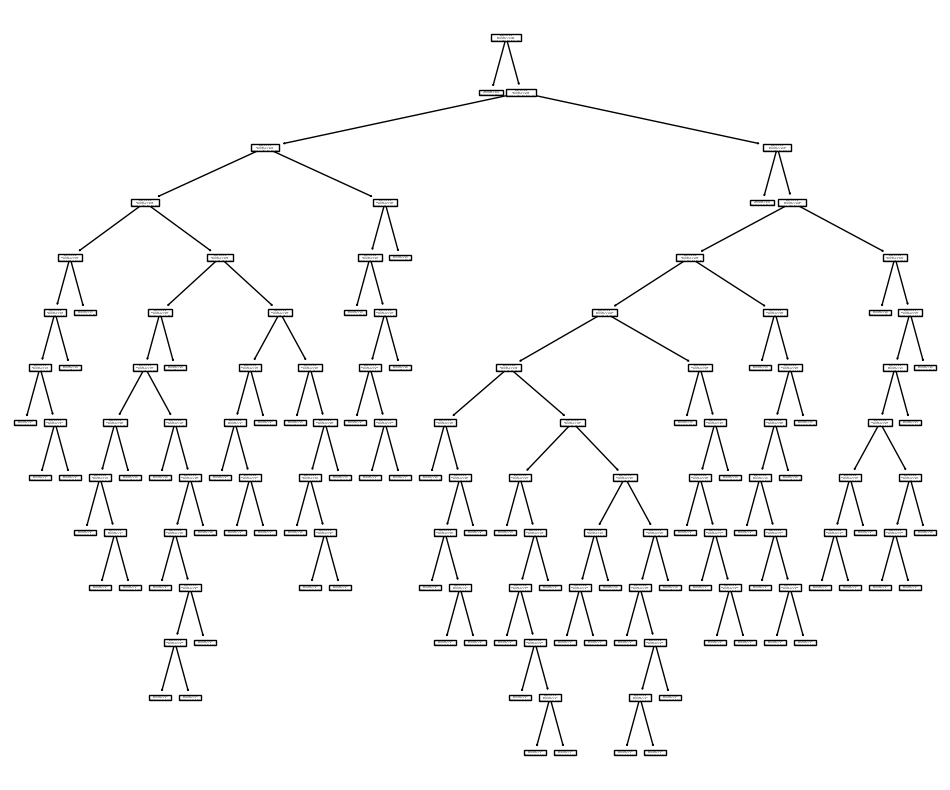

In [46]:
plt.figure(figsize=(12,10))
tree.plot_tree(dtc.fit(x_train,y_train))
plt.show()